In [1]:
import pandas as pd
import numpy as np
from ftplib import FTP
import os

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'figure.facecolor':'white'})

In [2]:
df_s = pd.read_csv('../data/S_seaice_extent_daily_v3.0.csv')
df_s.head()

,Year,Month,Day,Extent,Missing,Source Data
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,17.624,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,17.803,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,17.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,17.527,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...


In [3]:
df_s.columns

Index(['Year', ' Month', ' Day', '     Extent', '    Missing', ' Source Data'], dtype='object')

In [9]:
df_n = df_n.rename(columns={'Year': 'Year', ' Month': 'Month', ' Day': 'Day', '     Extent': 'Extent', '    Missing': 'Missing', ' Source Data': 'Source Data' })

In [10]:
df_n.columns

Index(['Year', 'Month', 'Day', 'Extent', 'Missing', 'Source Data'], dtype='object')

In [11]:
df_n.drop('Source Data', axis = 1, inplace = True)


In [12]:
df_n.head()

,Year,Month,Day,Extent,Missing
0,YYYY,MM,DD,10^6 sq km,10^6 sq km
1,1978,10,26,10.231,0.000
2,1978,10,28,10.420,0.000
3,1978,10,30,10.557,0.000
4,1978,11,01,10.670,0.000


In [13]:
df_n.tail()

,Year,Month,Day,Extent,Missing
14179,2022,02,28,14.671,0.000
14180,2022,03,01,14.693,0.000
14181,2022,03,02,14.765,0.000
14182,2022,03,03,14.703,0.000
14183,2022,03,04,14.748,0.000


In [14]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14184 entries, 0 to 14183
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     14184 non-null  object
 1   Month    14184 non-null  object
 2   Day      14184 non-null  object
 3   Extent   14184 non-null  object
 4   Missing  14184 non-null  object
dtypes: object(5)
memory usage: 554.2+ KB


In [15]:
df.nunique()

Year               42
 Month             12
 Day               31
     Extent     13078
    Missing         5
 Source Data    26354
hemisphere          2
dtype: int64

In [16]:
df.describe()

,Year,Month,Day,Extent,Missing
count,26354.000000,26354.000000,26354.000000,26354.000000,26354.000000
mean,2000.591941,6.507399,15.740685,11.494986,0.000003
std,10.896821,3.451938,8.801607,4.611734,0.000227
min,1978.000000,1.000000,1.000000,2.080000,0.000000
25%,1992.000000,4.000000,8.000000,7.601000,0.000000
50%,2001.000000,7.000000,16.000000,12.217000,0.000000
75%,2010.000000,10.000000,23.000000,15.114000,0.000000
max,2019.000000,12.000000,31.000000,20.201000,0.024000


In [17]:
df.isnull().sum()

Year            0
 Month          0
 Day            0
     Extent     0
    Missing     0
 Source Data    0
hemisphere      0
dtype: int64

In [35]:
# dropping first row
df_n = df_n.iloc[1: , :]

In [36]:
df_n.head()

,Year,Month,Day,Extent,Missing
1,1978,10,26,10.231,0.000
2,1978,10,28,10.420,0.000
3,1978,10,30,10.557,0.000
4,1978,11,01,10.670,0.000
5,1978,11,03,10.777,0.000


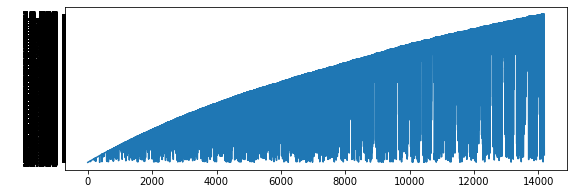

In [45]:
plt.figure(figsize=(9,3))
plt.plot(df_n.index,df_n['Extent'], label='Arctic')
#plt.legend(bbox_to_anchor=(0., -.362, 1., .102), loc=3, ncol=2, 
           #mode="expand", borderaxespad=0.)

<AxesSubplot:xlabel='Extent', ylabel='Density'>

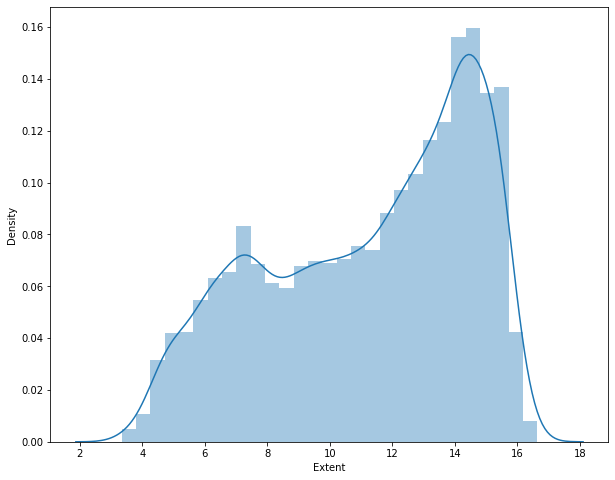

In [47]:
plt.figure(figsize=(10,8))
sns.distplot(df_n.Extent,label='Arctic')